In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import re

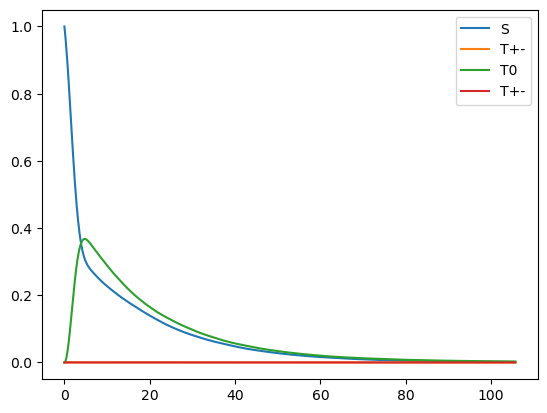

In [2]:
fieldon = np.loadtxt('fieldon_real.txt')

plt.plot(fieldon[:, 0], fieldon[:, 1:])
plt.legend(['S',"T+-","T0","T+-"])

plt.show()

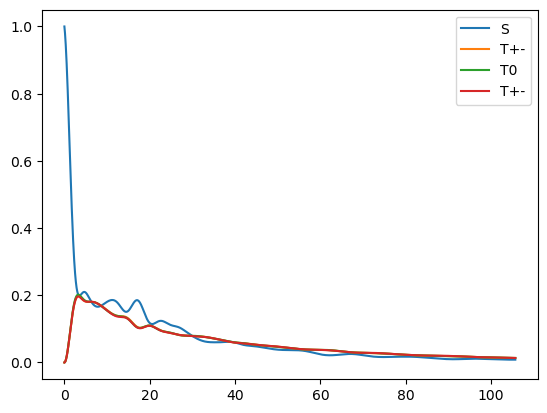

In [3]:
fieldoff = np.loadtxt('fieldoff_real.txt')

plt.plot(fieldoff[:, 0], fieldoff[:, 1:])
plt.legend(['S',"T+-","T0","T+-"])

plt.show()

In [4]:
ns = 4
a = 1
b = 3
kappa_diag = [a]+ [b]*(ns-1)
print(kappa_diag)

[1, 3, 3, 3]


In [5]:
def listkap_matkappa(kappa_diag, kappa_upper_right):
    ''' Calculate the kappa matrix from the list of diagonal and upper right non-diagonal kappas.
    '''

    matkappa = np.zeros((ns,ns))
    triangle = np.triu(np.ones((ns, ns), dtype=bool), k=1)
    matkappa[triangle] = kappa_upper_right  # Populate upper right non-diagonal elements
    matkappa += matkappa.T  # Symmetric adjustment
    for i in range(ns):
        matkappa[i, i] = -kappa_diag[i] - np.sum(matkappa[i, :])
    return matkappa

In [6]:
ns=int(4)
kappa_diag_values = [2, 2, 2,2]
kappa_upper_right_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
result_matrix = listkap_matkappa(kappa_diag_values, kappa_upper_right_values)

print(result_matrix)

[[-2.6  0.1  0.2  0.3]
 [ 0.1 -3.   0.4  0.5]
 [ 0.2  0.4 -3.2  0.6]
 [ 0.3  0.5  0.6 -3.4]]


In [7]:
gamma_e = 176.0859644  # gyromagnetic ratio of free electron spin in mT^-1 mus^-1

In [8]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import least_squares
from optimizer_spins import Optimizer
import pandas as pd

['Time', '1', '2', '3', '4']


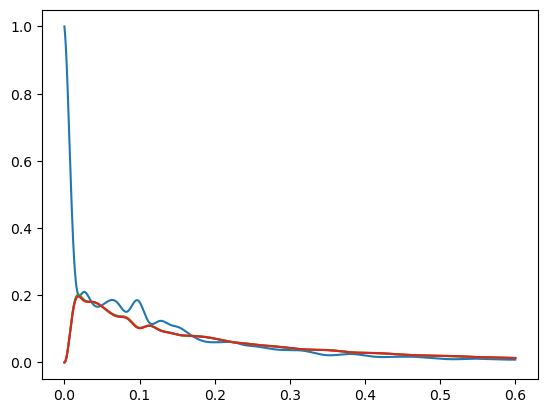

In [9]:
column_names = ["Time"]
data_path = "/u/dem/kebl6911/Part-II/spin_systems/fieldoff_real.txt"

for i in range(1,5):
    column_names.append(str(i))
print(column_names)
df = pd.read_csv(data_path, delimiter="\t", names=column_names, usecols=range(len(column_names)))

#df = df[(df.index % 10 == 0) | (df.index == len(df.index) - 1)]

df['Time'] = df['Time'] / gamma_e


# All the values within the df
values = df.values 
full_time = df["Time"].values # Unit of first time col assumed to be in ns

plt.plot(values[:,0],values[:,1:])

In [22]:
save_kappas = []

save_neg = []

#TESTING NUM ROWS
no_rows = values.shape[0]
index = no_rows//2
fit_val = values[index:]

optimize_init = Optimizer(fit_val,4,20,0.5, initial_kappas=None) #Ks and Kt in per microsecond
rms, optimized_kappas= optimize_init.run()
print(rms)
save_kappas.append(optimized_kappas)

p0 = optimize_init.p0
save_neg.append(optimize_init.time_size*7)
save_kappas = np.array(save_kappas)

print(save_kappas)

0.21050715128839956
[[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10]]


[[2.31446839e+02 1.72346775e-02 1.72501717e-02 1.72734129e-02]
 [2.30659543e+02 1.72332094e-02 1.72487023e-02 1.72719415e-02]
 [2.29874925e+02 1.72317415e-02 1.72472330e-02 1.72704703e-02]
 ...
 [8.47093190e-03 1.33502743e-02 1.33622764e-02 1.33802794e-02]
 [8.44211694e-03 1.33491371e-02 1.33611381e-02 1.33791397e-02]
 [8.41340000e-03 1.33480000e-02 1.33600000e-02 1.33780000e-02]]


(0.0, 1.0)

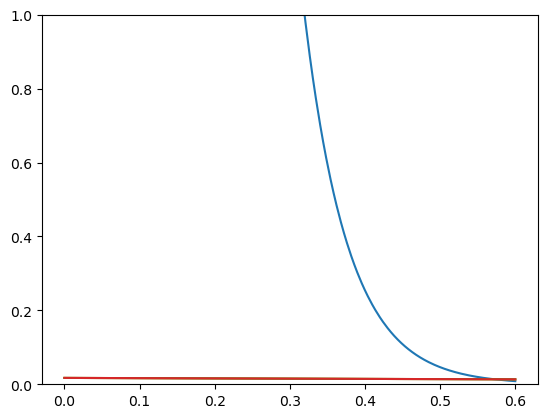

In [21]:
predict = optimize_init.predict(p0,values[:,0], 'back', save_kappas[0] )
print(predict)

#plt.plot(values[:,0],values[:,1:])
plt.plot(values[:,0],predict[:,0:])
plt.ylim(0,1)